# Introduction
As explained in [01.data-introduction](01.data-introduction.ipynb), the author (Dr. Roberto Detrano) intended to build a model to predict heart disease using the 13 variables and 1 target variable. He used cleveland dataset to build the model and predict against other datasets. The datasets are explained in the table below:

| Filename                   | Records (Rows) | Features (Cols) | Description                 |
|:---------------------------|:--------------:|:---------------:|:----------------------------|
| processed.cleveland.data   |      303       |       14        | Used for building the model |
| processed.hungarian.data   |      294       |       14        | Used for testing            |
| processed.va.data          |      200       |       14        | Used for testing            |
| processed.switzerland.data |      123       |       14        | Used for testing            |

## Data Dictionary
In the processed datasets (as described in [01.data-introduction](01.data-introduction.ipynb)), the author has mapped the following variables from the original (raw) dataset to processed dataset for building the model. Please find the <u>data dictionary for the processed dataset that is used in this study</u>.
| No  | Name         | Description                                              | Values                                                                                                                              |
|:----|:-------------|:---------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------|
| 1.  | age          | age in years                                             |                                                                                                                                     |
| 2.  | sex          | sex                                                      | 1: male <br> 0: female                                                                                                              |
| 3.  | cp           | chest pain type                                          | 1: typical angina <br> 2: atypical angina <br> 3: non-anginal pain <br> 4: asymptomatic                                             |
| 4.  | trestbps     | systolic blood pressure at rest (in mm Hg)               |                                                                                                                                     |
| 5.  | chol         | serum cholesterol in mg/dl                               |                                                                                                                                     |
| 6.  | fbs          | fasting blood sugar > 120 mg/dl                          | 1: true <br> 0: false                                                                                                               |
| 7.  | restecg      | resting electrocardiographic results                     | 0: normal <br> 1: having ST-T wave abnormality <br> 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| 8.  | thalach      | maximum heart rate achieved                              |                                                                                                                                     |
| 9.  | exang        | exercise induced angina                                  | 1: yes <br> 0: no                                                                                                                   |
| 10. | oldpeak      | ST depression induced by exercise relative to rest       |                                                                                                                                     |
| 11. | slope        | the slope of the peak exercise ST segment                | 1: upsloping <br> 2: flat <br> 3: downsloping                                                                                       |
| 12. | ca           | number of major vessels (0-3) colored by fluoroscopy     |                                                                                                                                     |
| 13. | thal         |                                                          | 3: normal <br> 6: fixed defect <br> 7: reversable defect                                                                            |
| 14. | num (target) | diagnosis of heart disease (angiographic disease status) | 0: < 50% diameter narrowing <br> 1: > 50% diameter narrowing                                                                        |

# The Objective
In attempts to build ML models using the heart-disease dataset, the following questions needs clarification in this stage (data exploration).
1. What problem needs to be solved?
2. Does the dataset have duplicate rows (records)?
3. What data-types the dataset contains?
4. Does the dataset have empty columns (features)?
5. Is the dataset sufficient for building the model(s)?
6. Which feature appears more important than the other?

Once, these questions are clarified, a list of action items can help for next stage.

Let's load the necessary libraries and data for investigation.

In [ ]:
# All required libraries.
import pandas as pd
from scipy.special import label

from custom_libs import helper

In [ ]:
header =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('data/uci-heart-disease/processed.cleveland.data', names=header)
# 303 records and 14 columns.
data.head(5)

## 1. What problem needs to be solved?
<b>Classify</b> - whether a patient has heart disease based on his/her medical data.

At a glance, it appears to be binary classification problem.\
From the data-dictionary, `num` appears as the target variable. Let's investigate the target variable's supportability for <u>binary classification</u> problem.

In [ ]:
# Target variable (num) has integer data-type.
data.info()

In [ ]:
# Target variable (num) has more than two values/classes. Meanwhile, binary classification requires only 2 values/classes.
data['num'].value_counts()

### Observation:
The target variable (num) cannot support binary classification since it has more than 2 values/classes. \
If we understood the original intention from the data-dictionary and the literature:
- Any patient with less than 50% vessel narrowing was marked as `value: 0` -- no heart disease
- Any patient with more than 50% vessel narrowing was marked as `value: 1` -- has heart disease. This was further expanded to 1, 2, 3 and 4 based on affected major vessel.

### Conclusion:
We <u>can safely convert this to a binary classification problem</u> by replacing any values of target variable (num) other than `0` to `1`. This logically simplifies that any patient with vessel narrowing more than 50% is suspected to have heart-disease (without distorting the original meaning much).

### Action(s)
1. Convert any values in target variable (num) other than `0` to `1` - to support binary classification problem.
2. Also, rename the target variable from `num` to `target` to give a more meaningful name.

In [ ]:
# 1. Convert any values in target variable (num) other than `0` to `1` - to support binary classification problem.
# Let's see the count before conversion
data['num'].value_counts()

In [ ]:
# Let's see if the sum of 1, 2, 3 and 4 has total up to 55 + 36 + 35 + 13 = 139.
data.loc[data['num']!=0,"num"]=1
data['num'].value_counts()

In [ ]:
# 2. Also, rename the target variable from `num` to `target` to give a more meaningful name.
data.rename(columns={'num':'target'}, inplace=True)

In [ ]:
# The new 'target' column tallies with the old 'num' column.
data['target'].value_counts()

## 2. Does the dataset have duplicate rows (records)?
So, we converted the target variable from multi-class to binary to support binary classification problem. \
Now, let's investigate if any duplicate records (rows) present in the dataset.

In [ ]:
# All columns were checked, and no duplicate record found.
data[data.duplicated()]

## 3. What data-types the dataset contains?
We got the basic idea about the data types from the 'data-dictionary'. let's investigate and verify further the content.

In [ ]:
data.info()

All features appears to be in numerical format except for `ca` and `thal`. They appear to be categorical from 'data-dictionary'. Let's investigate further.

In [ ]:
# For column 'ca', 4 records contains the value of '?'.
data['ca'].value_counts()

In [ ]:
# For column 'thal', 2 records contains the value of '?'.
data['thal'].value_counts()

In [ ]:
# Let's investigate if the total 6 (4 from 'ca' and 2 from 'thal') records are disjoint, using OR operator first.
# Only when OR operator doesn't satisfy, we will use AND operator to further investigate if records are distributed between two features.
# Looks like the sum is 6, and they are disjoint (using OR operator).
data[(data['thal']=='?') | (data['ca']=='?')]

In [ ]:
# There is only < 2% uninterpretable data found in 'ca' and 'thal' with '?' character.
print(f'In ca there is {round(helper.value_count(data,'ca','?'),2)}% of ? values found.')
print(f'In thal there is {round(helper.value_count(data,'thal','?'),2)}% of ? values found.')

### Observation:
From the investigation, it appears feature `ca` and `thal` have uninterpretable values which is `?`. \
Together there are 6 records (4 from `ca` and 2 from `thal`) and they are disjoint. \
There is only less than 2% of uninterpretable data found in both `ca` and `thal`.

### Conclusion
Since features in the dataset were already narrowed from 76 to 14 based on their importance for meaningful medical interpretation, dropping the 6 records appears to be more reasonable. This reason: the two variables cannot be imputed with 'mean' because through they appears in numeric format they were originally in categorical format and were already converted.

### Action(s)
1. Drop records for feature `ca` and `thal` that are `?`

In [ ]:
# Drop records for feature `ca` and `thal` that are `?` The new total records are 303 - 6 = 297.
filtered = data[(data['thal'] == '?') | (data['ca'] == '?')].index
data.drop(filtered, inplace=True)
data.shape

## 4. Does the dataset have empty columns (features)?
Now that we have verified the data consistencies, let's <u>investigate if any data is missing in the dataset</u>.

In [ ]:
# No missing data. isnull and isna is the same, checking for None, NaN or NaT (datetime)
data.isnull().sum()

## 5. Is the dataset sufficient for building the model(s)?
Now that the dataset was cleansed, let's explore the data for further analysis (with graphs when needed).

In [21]:
# Let's save a copy of the cleansed dataset for building models.
data.to_csv('data/uci-heart-disease/processed.cleveland-cleansed.data', index=False)

# Load the saved data for verification.
cleansed_data = pd.read_csv('data/uci-heart-disease/processed.cleveland-cleansed.data')
cleansed_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [35]:
import seaborn as sns

# Ideally we should expect both classes in the target variable to have same proportion, i.e. ~148.
len(cleansed_data["target"]) / 2

148.5

In [36]:
# Nevertheless, a slight risk variation can be accepted. Let's investigate if the target class in balanced.
cleansed_data['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [37]:
# To get the percentage proportion, let's view the normalized value counts.
# So, the deviation in the distribution is ~4%.
cleansed_data['target'].value_counts(normalize=True)

target
0    0.538721
1    0.461279
Name: proportion, dtype: float64

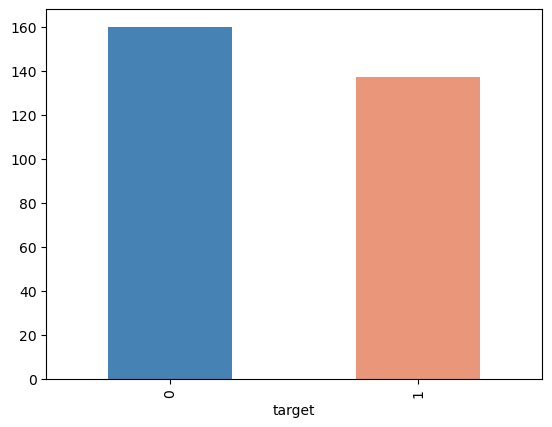

In [48]:
# Let's see the distribution of target variable's class in bar-chart.
cleansed_data.target.value_counts().plot(kind="bar", color=['steelblue','darksalmon']);